In [1]:
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = joblib.load("rewards_math.joblib")

response_types = ['noack_wrong', 'noack_correct', 'ack_correct']
experiments = ['original', 'instruction']

rt_map = {'noack_wrong': 'No acknowledgment + Wrong', 'noack_correct': 'No acknowledgment + Correct', 'ack_correct': 'Acknowledgment + Correct'}
linestyle_map = {'noack_wrong': '-', 'noack_correct': '--', 'ack_correct': ':'}
rw_map = {'skywork-gemma': 'SK-Gemma 27B'}

### Main Paper

For the main paper we want to show only for one reward model, side by side.

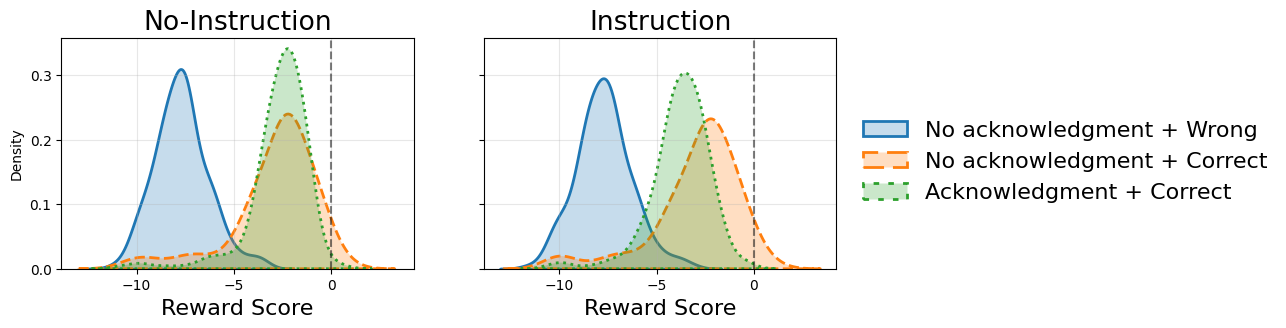

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10,3), sharey=True, sharex=True)

fs = 16
plt.rcParams.update({'font.size': fs}) 


kwargs = {'fill': True, 'linewidth': 2}
rw_data = data['skywork-gemma']
for ix, rt in enumerate(response_types):
    data_to_plot = np.array(rw_data['original'][rt])
    sns.kdeplot(data_to_plot, ax=ax[0], label=rt_map[rt], linestyle=linestyle_map[rt], **kwargs)

    data_to_plot = np.array(rw_data['instruction'][rt])
    sns.kdeplot(data_to_plot, ax=ax[1], label=rt_map[rt], linestyle=linestyle_map[rt], **kwargs)

# Add title
ax[0].set_title(f"No-Instruction")
ax[1].set_title(f"Instruction")

ax[0].set_xlabel("Reward Score", fontsize=fs)
ax[1].set_xlabel("Reward Score", fontsize=fs)

ax[1].set_ylabel("")

# Add extra
for i in range(2):
    ax[i].grid(alpha=0.3)
    ax[i].axvline(x=0, color="black", linestyle="--", linewidth=1.5, alpha=0.5)

ax[1].legend(loc='lower center', bbox_to_anchor=(1.65, 0.2), ncols=1, frameon=False)

fig.savefig("../figures/motivation.png", dpi=300, bbox_inches='tight')